# Chapter 3 and 4 (Statistical Testing and Regression)

In [36]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Get the dataset
df = pd.read_csv("C:/Users/keele/Downloads/archive/StudentsPerformance.csv")

In [5]:
print(df.describe())
df.head()

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- Metric to compare: mean math score
- A/B Test Categorical Variables: Gender (male/female)
- Null Hypothesis: The mean math score is the same regardless of gender
- Alternative Hypothesis: The mean math score is different between genders.

In [6]:
# Minimize Original Dataset
df_minimized = df[['gender', 'math score']]
df_minimized.head()

,gender,math score
0,female,72
1,female,69
2,female,90
3,male,47
4,male,76


In [7]:
df_minimized['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [8]:
# Calculate the mean, standard deviation, and median math score for each gender

female_mean = df[df['gender'] == 'female']['math score'].mean()
female_std = df[df['gender'] == 'female']['math score'].std()
female_median = df[df['gender'] == 'female']['math score'].median()

print(f"Female mean math score is {female_mean}")
print(f"Female standard deviation of math score is {female_std}")
print(f"Female median math score is {female_median}")

male_mean = df[df['gender'] == 'male']['math score'].mean()
male_std = df[df['gender'] == 'male']['math score'].std()
male_median = df[df['gender'] == 'male']['math score'].median()

print(f"Male mean math score is {male_mean}")
print(f"Male standard deviation of math score is {male_std}")
print(f"Male median math score is {male_median}")

Female mean math score is 63.633204633204635
Female standard deviation of math score is 15.49145324233952
Female median math score is 65.0
Male mean math score is 68.72821576763485
Male standard deviation of math score is 14.356277196362383
Male median math score is 69.0


Inferences:
- Males have a higher mean math score by about 5.1 points
- Both genders have a similar spread (std)
- Males have a higher median math score by 4 (higher not just on average but also at the "middle" of the distribution)

Intuition: Males appear to score higher than females in this dataset

In [9]:
# Run a two sample t-test using female and male math scores, then share the t-statistic and p-value

# Get the 2 samples
female_sample = df[df['gender'] == 'female']['math score']
male_sample = df[df['gender'] == 'male']['math score']

# Calculate the t-statistic and p-values for each sample
t_statistic, p_value = stats.ttest_ind(female_sample, male_sample)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Standard significance level
alpha = 0.05

# Check if significant
if p_value < alpha:
    print("Reject the null hypothesis: there is a statistically significant difference between the means of the genders.")
else:
    print("DO NOT reject the null hypothesis: there IS NOT a statistically significant difference between the means of the genders.")

T-statistic: -5.383245869828983
P-value: 9.120185549328822e-08
Reject the null hypothesis: there is a statistically significant difference between the means of the genders.


I tested whether male and female students differ in their average math scores using an independent two-sample t-test.

- **Null hypothesis:** µ_female = µ_male
- **Alternative hypothesis:** µ_female ≠ µ_male

Using the sample data:
- Female mean math score: ~63.63
- Male mean math score: ~68.73

The t-test returned:
- **t-statistic:** -5.38
- **p-value:** 9.12 x 10⁻⁸

The **t-statistic** of -5.38 means that the observed difference in mean math scores (about 5 points lower for females) is about 5.38 standard errors away from zero. In other words, the difference is large relative to the noise/variability in the data.

The **p-value** of 9.12 x 10⁻⁸ represents the probability of seeing a difference in sample means at least this extreme *if* there were actually no true difference in average math scores between genders in the population. Since this p-value is far below the standard significance level alpha(α) = 0.05, I reject the null hypothesis.

**Conclusion:** There is strong statistical evidence that male and female students have different mean math scores in this dataset, with males scoring higher on average.

Predict reading score from writing score

In [14]:
# Fit a linear regression model

X = df[['reading score']]
y = df['writing score']

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# Predict and present model

y_pred = model.predict(X)

print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")
print(f"R2: {r2_score(y, y_pred)}")

Intercept: -0.667553640932951
Slope: [0.99353111]
R2: 0.9112574888913137


- A student's reading score very accurately predicts their writing score
- For every point increase in reading, writing increases by about 1 point
- The linear regression model explains over 91% of the variation in writing scores which is an unusually strong linear relationship

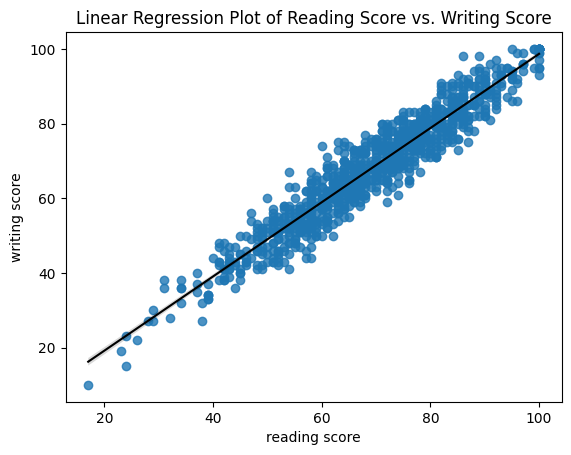

In [26]:
# Plot the linear regression
sns.regplot(x='reading score', y='writing score', data=df, line_kws={'color':'black', "linewidth":1.5})
plt.title("Linear Regression Plot of Reading Score vs. Writing Score")
plt.show()

In [29]:
# Multiple Regression using ind. vars. = gender, reading, writing to predict math score

# One-hot encode gender to make it numerical
df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True, dtype=int)

# Set X and y. You use gender_male because the drop_first=True drops female, since female alphabetially comes before male, and gender_male is the auto name
X_mult = df_encoded[['gender_male', 'reading score', 'writing score']] # independent variables
y_mult = df_encoded['math score'] # depenent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mult, y_mult, test_size = 0.2, random_state=42)

# Fit the data
model_mult = LinearRegression()
model_mult.fit(X_train, y_train)

# Predict
model_mult.predict(X_test)

# Print the intercept, slope (coefficient), and R2 score
print(f"Intercept: {model_mult.intercept_}")
print(f"Slope: {model_mult.coef_}")
print(f"R2: {model_mult.score(X_test, y_test)}")

Intercept: -6.004834517577905
Slope: [12.98117847  0.35616027  0.60737367]
R2: 0.8598957338975717


- Holding Reading and Writing constant, males score 12.98 points higher in math than females
- Writing is almost 2x more predictive of math than reading is (0.36 vs 0.61)
- My model explains 86% of the variance in math scores

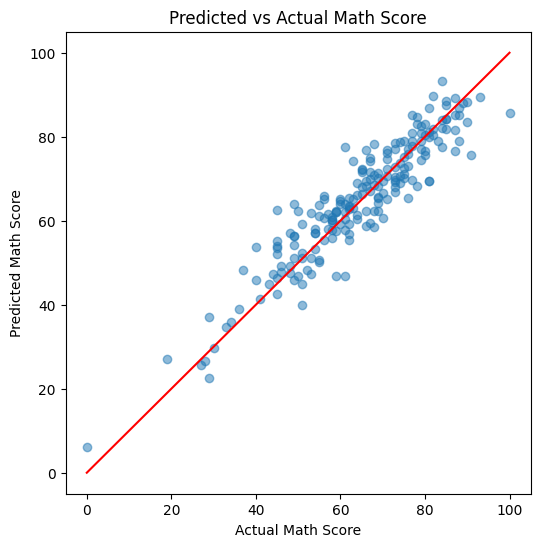

In [ ]:
# Compute/Plot predicitons and residuals

y_pred_mult = model_mult.predict(X_test)

residuals = y_test - y_pred_mult

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_mult, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Predicted vs Actual Math Score")
plt.show()

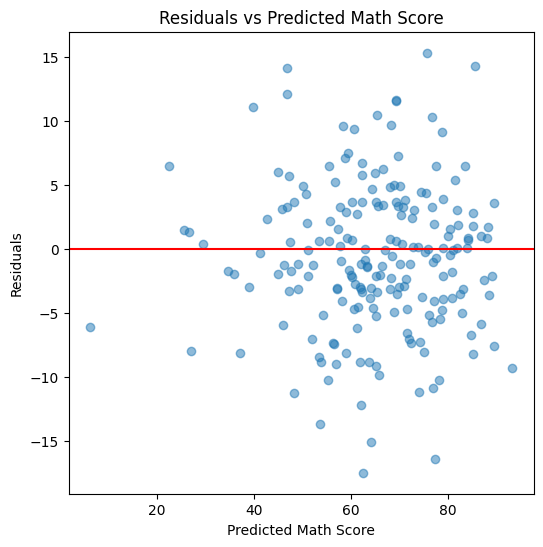

In [33]:
# Plot Residuals vs Predicted

plt.figure(figsize=(6,6))
plt.scatter(y_pred_mult, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted Math Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Math Score")
plt.show()

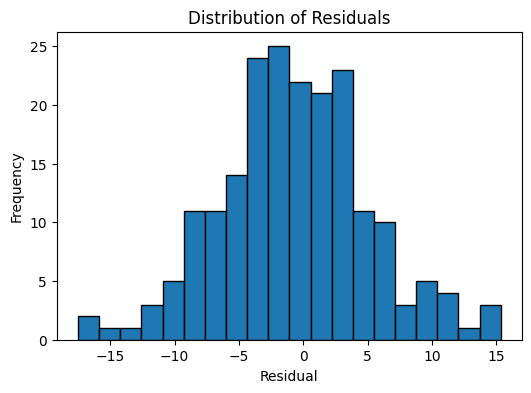

In [35]:
# Plot Residual Histogram

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

## Summary
I evaluated the multiple regression model using 3 key diagnostic plots

1. Predicted vs Actual
Predicted values closely follow the diagonal reference line, indicating a strong model accuracy consistent with the R2 of 0.86.

2. Residuals vs Predicted
Residuals are randomly scattered around zero with no curved shape or increasing variance pattern. This suggests that the assumptions of linearity and homoskedacity are reasonably satisfied.

3. Residual Distribution
Residuals form an approzimately normal, symmetric distribution centered at zero. This supports the normality of errors assumption.

### Overall Conclusion:
The multiple regression model performs well, meets its key assumptions, and provides a reliable linear explanation of math scores using gender, readon score, and writing score.

In [37]:
# Multicollinearity Check (Variance Inflation Factor (VIF))

# Select the independent features used
X_vif = df_encoded[['gender_male', 'reading score', 'writing score']]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["feature"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif

,feature,VIF
0,gender_male,1.797519
1,reading score,257.042564
2,writing score,250.176996


- Reading score and writing score have extremely high VIF values, indicating severe multicollinearity.
- This means the two variables are highly correlated and contain largely overlapping information.
- As a result, the individual coefficients for reading and writing may be unstable, but the model's predictions remain reliable (R2 = 0.86).
- The gender_male VIF is low (1.8), so the gender coefficient is stable and interpretable.